© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/phd_students/seleznova/index.html) 2022

https://github.com/mselezniova/MSML22

Distributed under the [Creative Commons Attribution License](https://creativecommons.org/licenses/by/4.0/)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib
import matplotlib.pyplot as plt

import os

import numpy as np
import pandas as pd

# Poisson regression on Seoul Bike Sharing Demand Data Set 

[Seoul Bike Sharing Demand Data Set](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) contains data about the number of rented bikes per day, together with parameters describing the day (weather, season, day of week, etc.). The goal is to predict the count of rented bikes based on all the other data columns.

Load the dataset:

In [2]:
file_name = 'SeoulBikeData.csv'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'

if os.path.exists(file_name):
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, index_col=0, encoding='latin-1')
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url)
    df.to_csv(file_name, encoding='latin-1')
    print('Done.')

Loading data from local file `SeoulBikeData.csv`...


In [3]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


The dataset contains **categorical variables**, which take only a limited number of non-ordered values (e.g. columns Seasons or Holiday). These variables cannot be treated as numerical variables, since their value is not meaningful. Thus, it is important to transform categorical variables to meaningful numerical variables during data preprocessing. In this task, we use **one-hot-encoding** for this purpose, which creates a separate data column with values 0 and 1, corresponding to each possible value of the categorical variable. E.g. the column Seasons is transformed into 4 columns (Seasons_Autumn, Seasons_Spring, Seasons_Summer , Seasons_Winter), only one of which contains value 1 in each data row. 

We implement one-hot-encoding by a ready-made pandas function:

In [4]:
df = pd.get_dummies(df, columns=['Hour','Seasons','Holiday','Functioning Day'])

df

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,...,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
Date,,,,,,,,,,,,,,,,,,,,,
01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,1,0,1
01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,1
01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,1
01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,1
01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,1
30/11/2018,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,1
30/11/2018,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,1


In [5]:
def  train_test_split(df, training_data_fraction, shuffle=True):
    
    if shuffle is True:
        df_ = df.sample(frac=1).reset_index(drop=True)
    else:
        df_= df
    
    train_df = df_.iloc[:round(training_data_fraction*len(df_)),:]
    test_df = df_.iloc[round(training_data_fraction*len(df_)):,:]
    
    return df_, train_df, test_df



training_data_fraction = .8

df, train_df, test_df =  train_test_split(df, training_data_fraction)

The first column of the dataframe is the value that we want to predict using all the other columns. Therefore, we define $X$ and $Y$ as follows:

In [6]:
X = df.iloc[:,1:].to_numpy()
Y = df.iloc[:,0].to_numpy()

train_X = train_df.iloc[:,1:].to_numpy()
train_Y = train_df.iloc[:,0].to_numpy()

test_X = test_df.iloc[:,1:].to_numpy()
test_Y = test_df.iloc[:,0].to_numpy()

We also apply min-max normalization to the data:

In [7]:
def normalize(x):
    return (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))

X = normalize(X)
train_X = normalize(train_X)
test_X = normalize(test_X)

The output function of the Poisson regression model is given by:

$$ h(x) = e^{\langle w, x\rangle + b} $$

And the loss function is defined as follows:

$$\mathcal{R}(X,Y,w,b) = \dfrac{1}{N} \sum_{i=1}^N \bigl( h(x_i) -  y_i \log h(x_i)\bigr) 
= \dfrac{1}{N} \|h(X) - Y\odot \log h(X) \|_1$$

Therefore, we get the following expressions for the gradients of the loss:

$$\nabla_w \mathcal{R} = \dfrac{1}{N} \sum_{i=1}^N (h(x_i) - y_i) x_i = \dfrac{1}{N} X^T (h(X)-Y)$$
$$\nabla_b \mathcal{R} = \dfrac{1}{N} \sum_{i=1}^N (h(x_i) - y_i) = \dfrac{1}{N} \mathbb{1}^T (h(X)-Y)$$

We now use these expressions in the implementation:

In [8]:
class LinearRegression:

    def __init__(self, w, b):
        self._w = np.array(w, dtype=float)
        self._b = np.array(b, dtype=float)
        self.history = [{'w': self._w.copy(),
                         'b': self._b.copy(),
                         'loss': None}]
        
    def h(self, x):
        return x @ self._w + self._b
    
    def mean_abs_error(self,X,Y):
        return np.mean(np.abs(self.h(X) - Y))
    
    def loss(self, X, Y):
        lin_term = X@self._w + self._b*np.ones(X.shape[0]) - Y
        return 0.5/X.shape[0]*np.dot(lin_term,lin_term)
    
    def loss_grad(self, X,Y):
        lin_term = X@self._w + self._b*np.ones(X.shape[0]) - Y
        return X.T@(lin_term)/X.shape[0], np.mean(lin_term, axis=0)
    
    def train(self, X, Y, lr = 1e-3, num_iter = 100):

        self.history[0]['loss'] = self.loss(X,Y)
        
        for e in range(num_iter):
            
            grad_w, grad_b = self.loss_grad(X,Y)
            self._w -= lr*grad_w
            self._b -= lr*grad_b
            
            self.history.append({'w': self._w.copy(),
                                 'b': self._b.copy(),
                                 'loss': self.loss(X,Y)})
            
        return self._w, self._b
    

    
class PoissonRegression(LinearRegression):
    
    def __init__(self, w, b,l):
        super().__init__(w,b)
        self.l = l
        self.activation = lambda x: np.exp(x)
        
        
    def h(self,x):
        return self.activation(x @ self._w + self._b)
    
    def mean_abs_error(self,X,Y):
        return np.mean(np.abs(self.h(X) - Y))
    
    def loss(self,X,Y):
        lin_term = X @ self._w + self._b
        return np.mean(self.activation(lin_term) -
                       Y*lin_term) 
    
    def loss_grad(self,X,Y):
        lin_term = self.activation(X@self._w+self._b) - Y
        return  X.T@lin_term/X.shape[0] + self.l*self._w, np.mean(lin_term, axis=0)

Train a Poisson regression model:

In [9]:
w = [0]*X.shape[1]
b = 0

poisson = PoissonRegression(w, b, l=0.)
poisson.train(train_X,train_Y,lr = 1e-4, num_iter = 20000)

(array([ 0.71266438, -1.29589217, -0.1334573 ,  0.01558776,  0.9208045 ,
         0.19179721, -2.78984384, -0.59129537,  0.10814582, -0.08892416,
        -0.41420225, -0.80327538, -1.22281291, -1.17638806, -0.4164993 ,
         0.29722288,  0.76306688,  0.18153029, -0.13232069, -0.1176618 ,
        -0.01288127, -0.01592597,  0.01269952,  0.08649744,  0.23165193,
         0.50272342,  0.8653548 ,  0.71581764,  0.67346905,  0.68648509,
         0.56813945,  0.29758379,  0.74590732,  0.54134636,  0.53941623,
        -0.23717372,  0.70217191,  0.88732429, -1.57482429,  3.16432049]),
 array(1.5894962))

Compute mean absolute error on test:

In [10]:
poisson.mean_abs_error(test_X,test_Y)

214.93528966244065

Learning curve:

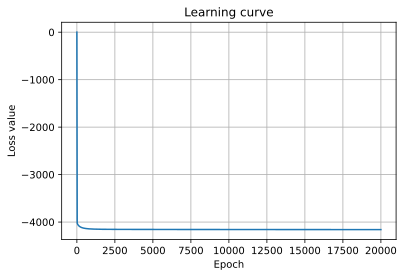

In [11]:
fig, ax = plt.subplots()

loss_history = [h['loss'] for h in poisson.history]

ax.plot(range(len(poisson.history)), loss_history)
ax.set_ylabel('Loss value')

ax.set_xlabel('Epoch')

plt.title('Learning curve')
plt.grid()

For comparison, let us also train a linear regression model:

In [12]:
w = [0]*X.shape[1]
b = 0

linreg = LinearRegression(w, b)
linreg.train(train_X,train_Y,lr = 1e-2, num_iter = 20000)

(array([ 793.33366019, -820.38397827,  -29.94354248,   39.64370825,
         438.14787146,  298.90278865, -408.14461048,   32.81659726,
         -50.03861415, -136.00083315, -248.00336571, -339.54524216,
        -400.85107396, -374.95203275, -220.79639045,   74.85969543,
         460.2155686 ,  -32.8101019 , -258.74640969, -279.56638372,
        -225.13742646, -237.72166824, -208.64329068, -138.61337051,
          -5.98355707,  282.32133613,  722.84830959,  468.70771415,
         388.19512982,  402.19779342,  275.34730009,   62.33557777,
         167.13534611,    7.11568736,   23.02524717, -217.65761624,
         -72.09459208,   51.71325648, -468.38728277,  448.00594717]),
 array(-20.3813356))

And compare the absolute error on test:

In [13]:
linreg.mean_abs_error(test_X,test_Y)

283.3163668823611

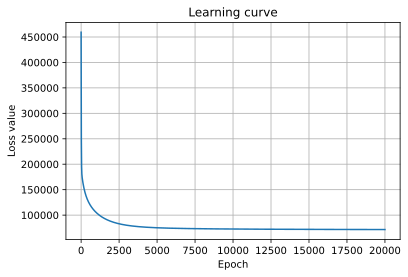

In [14]:
fig, ax = plt.subplots()

loss_history = [h['loss'] for h in linreg.history]

ax.plot(range(len(linreg.history)), loss_history)
ax.set_ylabel('Loss value')

ax.set_xlabel('Epoch')

plt.title('Learning curve')
plt.grid()

Thus, one can see that the Poisson regression model significantly outperforms the linear regression model on the task!